In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [6]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Amazon_Sale_Report.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_12928\1759737060.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Amazon_Sale_Report.csv")


In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [19]:
# Checking statistical detail of the data
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [25]:
# checking exclusively the dtypes for better clarity (optional)
print(df.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object


In [13]:
# Check for missing values
print(df.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [16]:
# Fill categorical missing values
df["Courier Status"]=df.fillna("Not available", inplace=True)
df["currency"].fillna("Unknown", inplace=True)
df["ship-city"].fillna("Unknown", inplace=True)
df["ship-state"].fillna("Unknown", inplace=True)
df["ship-country"].fillna("Unknown", inplace=True)
df["promotion-ids"].fillna("No promotion",inplace=True)

In [17]:
# Dropping unnecessary columns
df.drop(columns=["fulfilled-by","Unnamed: 22"],inplace=True)

In [22]:
# Filling the numerical columns values and also converting it from float64 to int64
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce").fillna(0).astype(int)
df["ship-postal-code"] = pd.to_numeric(df["ship-postal-code"], errors="coerce").fillna(0).astype(int)

In [23]:
#checking the updated data types
print(df.dtypes)

index                  int64
Order ID              object
Date                  object
Status                object
Fulfilment            object
Sales Channel         object
ship-service-level    object
Style                 object
SKU                   object
Category              object
Size                  object
ASIN                  object
Courier Status        object
Qty                    int64
currency              object
Amount                 int32
ship-city             object
ship-state            object
ship-postal-code       int32
ship-country          object
promotion-ids         object
B2B                     bool
dtype: object


In [29]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", format="%m-%d-%y")
print(df["Date"].dtype)

datetime64[ns]


In [30]:
print(df["Date"].head())

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]


In [33]:
# checking for duplicates columns
print(df.duplicated().sum())

0


In [36]:
# Checking the actual rows for duplicates
df[df.duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B


In [37]:
# Checking the new updates, before starting with EDA ( )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      0 non-null       object        
 13  Qty                 128975 no

In [140]:
# checking the cleaned dataset 
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Year,month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647,MUMBAI,MAHARASHTRA,400081,IN,Not available,False,2022,4
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022,4
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,2022,4
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753,PUDUCHERRY,PUDUCHERRY,605008,IN,Not available,False,2022,4
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574,CHENNAI,TAMIL NADU,600073,IN,Not available,False,2022,4
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,4
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653,CHANDIGARH,CHANDIGARH,160036,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,4
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399,HYDERABAD,TELANGANA,500032,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022,4
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,Not available,0,HYDERABAD,TELANGANA,500008,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,4
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363,Chennai,TAMIL NADU,600041,IN,Not available,False,2022,4


In [ ]:
## EDA (Exploratory Data Analysis)
# Analysing Trends by Year, Month and Region

In [39]:
df["Year"] = df["Date"].dt.year  # Extracts year from datetime column

In [41]:
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'Year'],
      dtype='object')


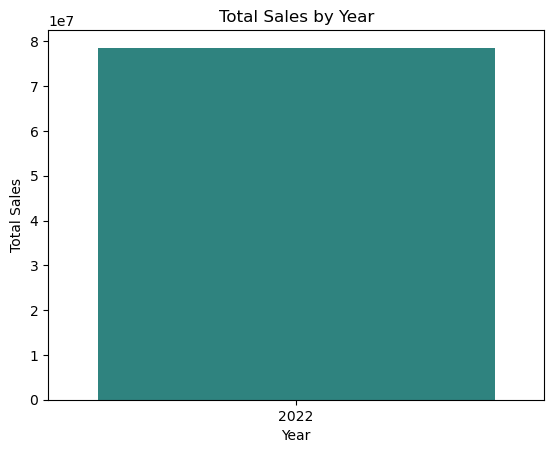

In [52]:
# Analysing Sales trend by year here

sales_by_year = df.groupby("Year")["Amount"].sum()
sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Year")
plt.show()

In [62]:
print(sales_by_year)

Year
2022    78590257
Name: Amount, dtype: int32


In [42]:
df["month"] = df["Date"].dt.month  # Extracts month from datetime column

In [43]:
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'Year', 'month'],
      dtype='object')


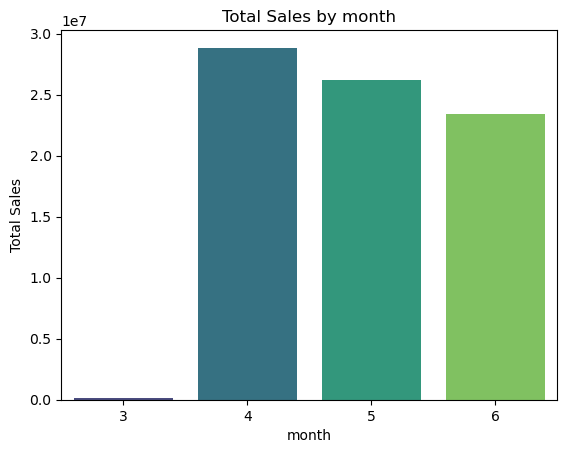

In [45]:
# Analysing Sales trend by month here

sales_by_month = df.groupby("month")["Amount"].sum()
sns.barplot(x=sales_by_month.index, y=sales_by_month.values, palette="viridis")
plt.xlabel("month")
plt.ylabel("Total Sales")
plt.title("Total Sales by month")
plt.show()

<AxesSubplot:xlabel='month', ylabel='Density'>

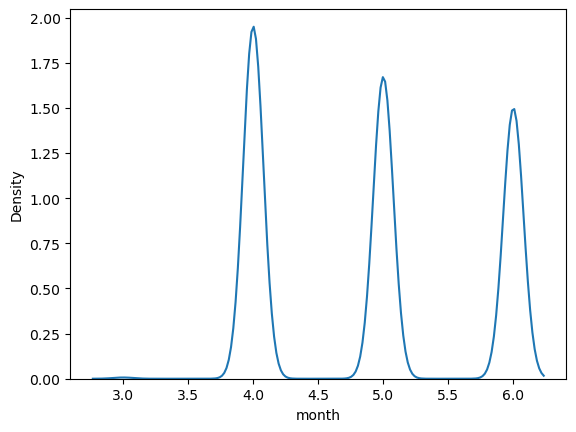

In [56]:
sns.lineplot(df.month)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month', ylabel='Density'>

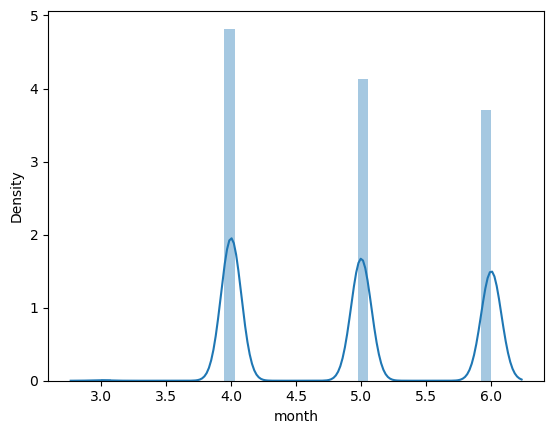

In [134]:
sns.distplot(df.month)

In [65]:
print(sales_by_month)

month
3      101680
4    28837654
5    26225635
6    23425288
Name: Amount, dtype: int32


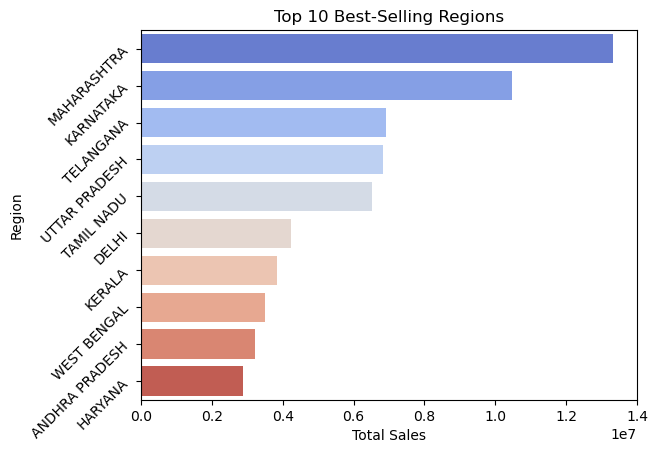

In [136]:
# Analysing Sales trend by Region (demographics)

sales_by_region = df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette="coolwarm")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.title("Top 10 Best-Selling Regions")
plt.yticks(rotation=45)
plt.show()

In [70]:
print(sales_by_region)

ship-state
MAHARASHTRA       13335157
KARNATAKA         10480840
TELANGANA          6916406
UTTAR PRADESH      6816401
TAMIL NADU         6515425
DELHI              4235099
KERALA             3830078
WEST BENGAL        3507767
ANDHRA PRADESH     3219709
HARYANA            2882030
Name: Amount, dtype: int32


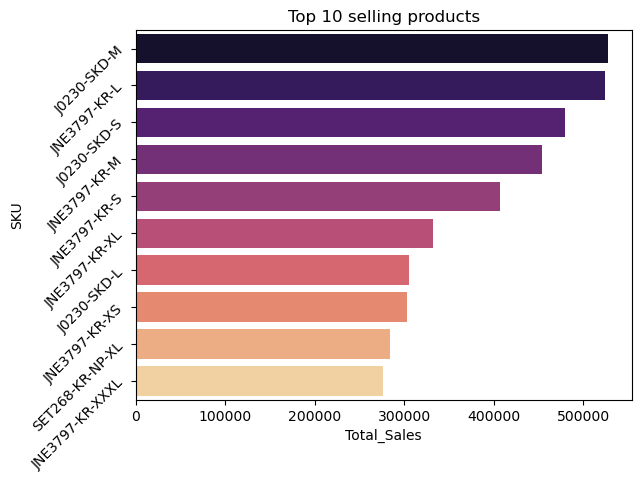

In [96]:
# Analyzing the high selling products.

top_products = df.groupby("SKU")["Amount"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.xlabel("Total_Sales")
plt.ylabel("SKU")
plt.title("Top 10 selling products")
plt.yticks(rotation=45)
plt.show()          

In [101]:
print(top_products)

SKU
J0230-SKD-M        527696
JNE3797-KR-L       524568
J0230-SKD-S        479933
JNE3797-KR-M       454279
JNE3797-KR-S       407294
JNE3797-KR-XL      332149
J0230-SKD-L        305615
JNE3797-KR-XS      303612
SET268-KR-NP-XL    284058
JNE3797-KR-XXXL    276370
Name: Amount, dtype: int32


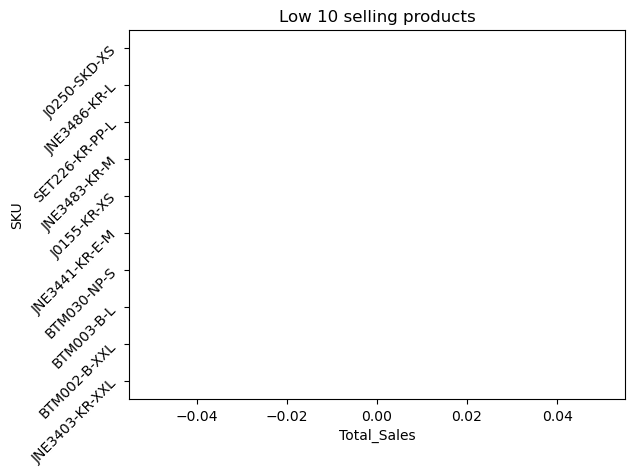

In [97]:
# Analyzing the low selling products.

low_products = df.groupby("SKU")["Amount"].sum().sort_values().head(10)
sns.barplot(x=low_products.values, y=low_products.index, palette="coolwarm")
plt.xlabel("Total_Sales")
plt.ylabel("SKU")
plt.title("Low 10 selling products")
plt.yticks(rotation=45)
plt.show()

In [103]:
print(low_products)

SKU
J0250-SKD-XS      0
JNE3486-KR-L      0
SET226-KR-PP-L    0
JNE3483-KR-M      0
J0155-KR-XS       0
JNE3441-KR-E-M    0
BTM030-NP-S       0
BTM003-B-L        0
BTM002-B-XXL      0
JNE3403-KR-XXL    0
Name: Amount, dtype: int32


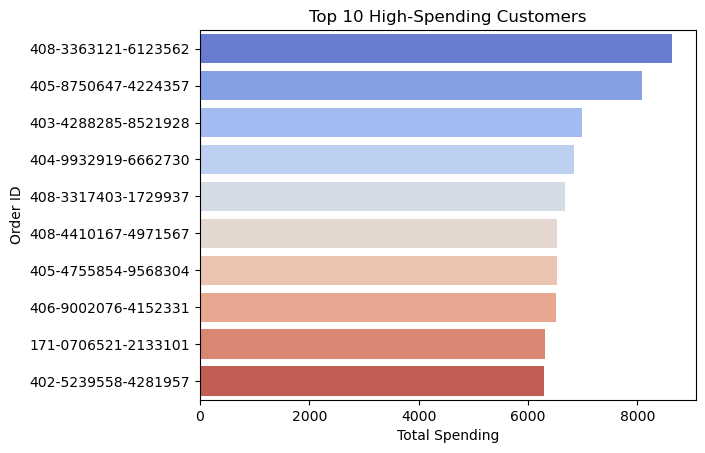

In [111]:
# Analyzing the spending patterns to target the best customers
# Top_spending customers
top_customers = df.groupby("Order ID")['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.values,y=top_customers.index, palette="coolwarm")
plt.xlabel("Total Spending")
plt.ylabel("Order ID")
plt.title("Top 10 High-Spending Customers")
plt.show()

In [112]:
print(top_customers)

Order ID
408-3363121-6123562    8636
405-8750647-4224357    8081
403-4288285-8521928    6993
404-9932919-6662730    6832
408-3317403-1729937    6680
408-4410167-4971567    6536
405-4755854-9568304    6535
406-9002076-4152331    6509
171-0706521-2133101    6313
402-5239558-4281957    6282
Name: Amount, dtype: int32


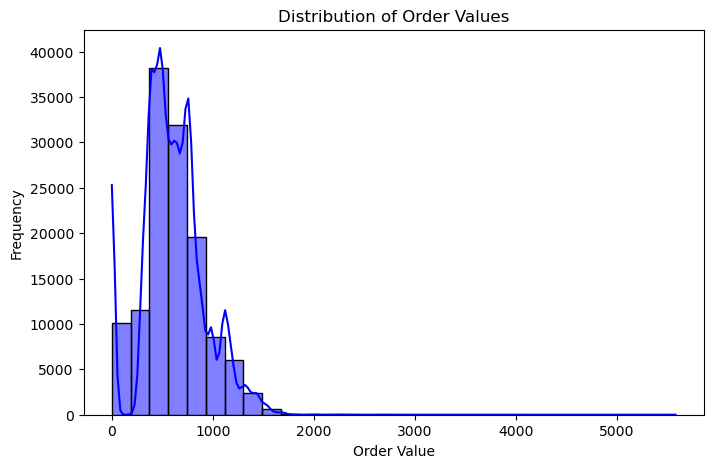

In [122]:
plt.figure(figsize=(8,5))
sns.histplot(df["Amount"], bins=30, kde=True, color="blue")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("Distribution of Order Values")
plt.show()

In [127]:
print(df.columns.tolist())

['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'Year', 'month']


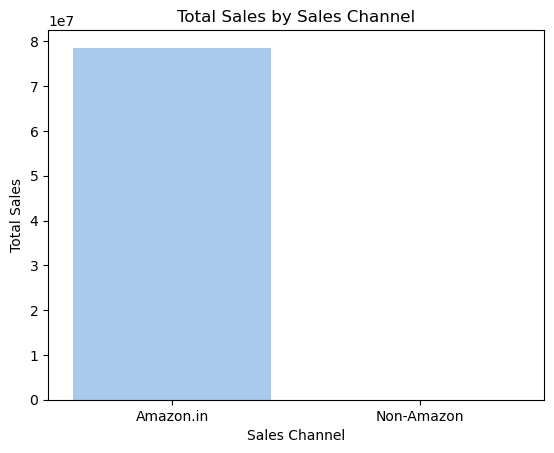

In [126]:
# conversion rate optimization(comparing the sales channel to assess the ROI)
# Notice the Sales Channel has a extra gap after channel
sales_by_channel = df.groupby('Sales Channel ')["Amount"].sum()
sns.barplot(x=sales_by_channel.index, y=sales_by_channel.values, palette="pastel")
plt.xlabel('Sales Channel')
plt.ylabel("Total Sales")
plt.title("Total Sales by Sales Channel")
plt.show()

In [ ]:
# Assessing which channels are bringing the most money — a strong indicator of ROI. 
# From the Analysis,it can be seen Amazon is dominating in term of sales channel, 
# Hence it can be said Amazon as Sales channel is bringing the most Amount.

In [142]:
df.to_csv("ecom_data_cleaned.csv", index=False)

In [143]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Year,month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647,MUMBAI,MAHARASHTRA,400081,IN,Not available,False,2022,4
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022,4
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,2022,4
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753,PUDUCHERRY,PUDUCHERRY,605008,IN,Not available,False,2022,4
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574,CHENNAI,TAMIL NADU,600073,IN,Not available,False,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517,HYDERABAD,TELANGANA,500013,IN,Not available,False,2022,5
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,5
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690,HYDERABAD,TELANGANA,500049,IN,Not available,False,2022,5
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,5
